In [34]:
# v3: subroute view forecast -1

In [35]:
!pip install prophet

In [36]:
import prophet as p
import pandas as pd

In [37]:
import glob
g=glob.glob('../input/sparce-routes-wfc/*.csv')

In [38]:
#!pip install openpyxl

In [39]:
df=pd.read_csv(g[1])
#m = p.Prophet()
#m.fit(df)
df.columns

Index(['Unnamed: 0', 'MktCoupons', 'Year', 'Quarter', 'BulkFare', 'Passengers',
       'MktFare', 'Pandemic', 'route', 'RPCarrier_9E', 'RPCarrier_AA',
       'RPCarrier_AS', 'RPCarrier_B6', 'RPCarrier_CP', 'RPCarrier_DL',
       'RPCarrier_EV', 'RPCarrier_F9', 'RPCarrier_G7', 'RPCarrier_HA',
       'RPCarrier_MQ', 'RPCarrier_NK', 'RPCarrier_OH', 'RPCarrier_OO',
       'RPCarrier_QX', 'RPCarrier_SY', 'RPCarrier_UA', 'RPCarrier_VX',
       'RPCarrier_WN', 'RPCarrier_YV', 'RPCarrier_YX', 'route_BUR-SFO',
       'route_FLL-LAX', 'route_FLL-SAN', 'route_FLL-SFO', 'route_LAX-FLL',
       'route_LAX-MCO', 'route_LAX-MIA', 'route_LAX-OAK', 'route_LAX-SFO',
       'route_LAX-SJC', 'route_LAX-SMF', 'route_LAX-TPA', 'route_MCO-LAX',
       'route_MCO-SAN', 'route_MCO-SFO', 'route_MCO-SMF', 'route_MIA-LAX',
       'route_MIA-SFO', 'route_OAK-LAX', 'route_PSP-SFO', 'route_SAN-MCO',
       'route_SAN-SFO', 'route_SAN-SJC', 'route_SAN-SMF', 'route_SAN-TPA',
       'route_SFO-BUR', 'route_SFO-FLL', 'r

In [40]:
df1=df[["MktFare"]].copy()
df1.columns

Index(['MktFare'], dtype='object')

In [41]:
df.loc[df['Quarter'] == 1, 'month'] = 2
df.loc[df['Quarter'] == 2, 'month'] = 5
df.loc[df['Quarter'] == 3, 'month'] = 8
df.loc[df['Quarter'] == 4, 'month'] = 11


In [42]:
df['day']=1

In [43]:
df1['ds']=pd.to_datetime(df[['Year','month','day']])

In [44]:
df1.columns=['y','ds']

In [45]:
df1.head()

,y,ds
0,5.0,2018-02-01
1,125.0,2018-02-01
2,130.0,2018-02-01
3,140.0,2018-02-01
4,150.0,2018-02-01


In [46]:
m = p.Prophet()
m.fit(df1)

In [47]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
371,2021-07-28
372,2021-07-29
373,2021-07-30
374,2021-07-31
375,2021-08-01


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
371,2021-07-28,28.211630,-195.560499,233.562250
372,2021-07-29,45.561737,-183.754842,282.544791
373,2021-07-30,61.486813,-146.585990,270.506212
374,2021-07-31,75.573053,-149.671036,294.453685
375,2021-08-01,87.438682,-124.329951,307.265937


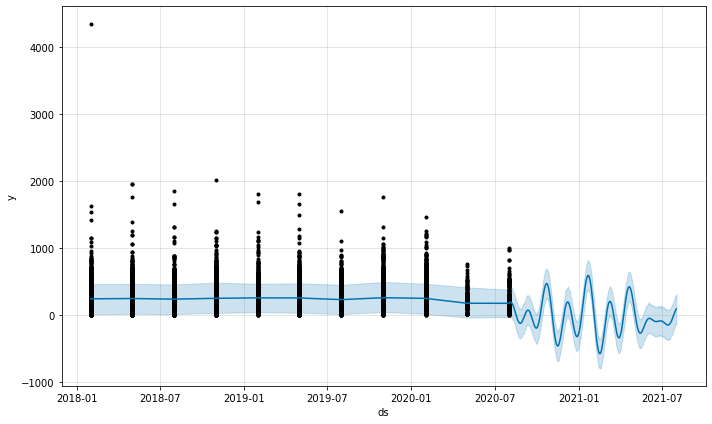

In [49]:
fig1 = m.plot(forecast)
